In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import xlrd as xl
import tensorflow as tf
from scipy import stats as sts

In [3]:
df = pd.read_csv('./melting-point/train.csv')

In [4]:
df_tm = df['Tm']
df_tm

0       213.15
1       407.15
2       324.15
3       351.15
4       126.15
         ...  
2657    256.45
2658    231.15
2659    256.25
2660    333.15
2661    328.15
Name: Tm, Length: 2662, dtype: float64

In [5]:
desc = df.describe()

rm = []
for col in desc:
    if desc[col]['min'] == desc[col]['max']:
        rm.append(col)

print(rm)
df_without_zeros = df.drop(columns=rm, axis=1)
df_without_zeros

['Group 12', 'Group 28', 'Group 46', 'Group 67', 'Group 73', 'Group 74', 'Group 75', 'Group 84', 'Group 85', 'Group 88', 'Group 90', 'Group 101', 'Group 102', 'Group 104', 'Group 150', 'Group 152', 'Group 155', 'Group 158', 'Group 160', 'Group 167', 'Group 183', 'Group 194', 'Group 198', 'Group 206', 'Group 207', 'Group 208', 'Group 209', 'Group 212', 'Group 213', 'Group 214', 'Group 215', 'Group 216', 'Group 217', 'Group 218', 'Group 245', 'Group 247', 'Group 248', 'Group 250', 'Group 252', 'Group 253', 'Group 264', 'Group 280', 'Group 281', 'Group 282', 'Group 285', 'Group 294', 'Group 303', 'Group 306', 'Group 307', 'Group 308', 'Group 309', 'Group 312', 'Group 313', 'Group 316', 'Group 317', 'Group 340', 'Group 342', 'Group 345', 'Group 347', 'Group 348', 'Group 349', 'Group 350', 'Group 352', 'Group 355', 'Group 356', 'Group 357', 'Group 358', 'Group 360', 'Group 363', 'Group 371', 'Group 376', 'Group 377', 'Group 383', 'Group 384', 'Group 385', 'Group 390', 'Group 397', 'Group 39

,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 406,Group 407,Group 408,Group 409,Group 410,Group 412,Group 414,Group 415,Group 416,Group 418
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,707,ClCCBr,256.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2658,1573,N#CC(Cl)(Cl)Cl,231.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,1634,Cc1ccc2c(C)cccc2c1,256.25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2660,3022,CCC(=O)c1ccc2ccccc2c1,333.15,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_wz_ws = df_without_zeros.drop(['id', 'SMILES'], axis=1)
df_wz_ws

,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,...,Group 406,Group 407,Group 408,Group 409,Group 410,Group 412,Group 414,Group 415,Group 416,Group 418
0,213.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,407.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,324.15,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,351.15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,126.15,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,256.45,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2658,231.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,256.25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2660,333.15,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
corr = []
obs_corr = []
for col in df_wz_ws:
    obs = df_wz_ws.Tm.corr(df_wz_ws[col])
    corr.append(obs)
    obs_corr.append((float(obs), col))

obs_corr = sorted(obs_corr, key=lambda tup: tup[0], reverse=True)

Text(0.5, 0, 'Group')

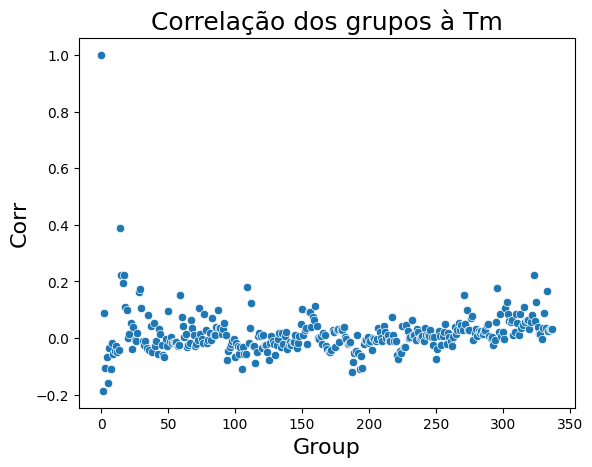

In [8]:
sns.scatterplot(data=corr)
plt.title('Correlação dos grupos à Tm', fontsize=18)
plt.ylabel('Corr', fontsize=16)
plt.xlabel('Group', fontsize=16)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

melting_point={}
melting_point["data"] = df_wz_ws.drop(['Tm'], axis=1).values
melting_point["target"] = df_wz_ws["Tm"].values

print(melting_point["data"].shape)
print(melting_point["target"].shape)

(2662, 337)
(2662,)


In [10]:
def norma_l2(X):
    X = X - np.mean(X, axis=0)
    X = X / np.linalg.norm(X, axis=0)
    return X

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(melting_point["data"], melting_point["target"], test_size=0.3)

lr = make_pipeline(LinearRegression())
reg = lr.fit(X_train, Y_train)

In [12]:
scores = cross_val_score(lr, norma_l2(melting_point["data"]), melting_point["target"], cv=10)
print(scores)
print(scores.mean())
print(scores.std())

[0.48932073 0.57497438 0.59430088 0.62725026 0.54482052 0.56245519
 0.57787891 0.53547625 0.53318515 0.62634738]
0.5666009660546164
0.04094110089251894


In [13]:
from sklearn.linear_model import RidgeCV

rg = RidgeCV(alphas=(1.0, 0.1, 0.01, 0.05, 0.005, 0.0025, 0.001, 0.00025),cv=10)
rg.fit(norma_l2(melting_point['data']), melting_point['target'])
print(rg.alpha_)

rg_scores = cross_val_score(rg, norma_l2(melting_point['data']), melting_point['target'], cv=10)
print(rg_scores)
print(rg_scores.mean())
print(rg_scores.std())

0.05
[0.48810547 0.57827081 0.61594329 0.63828719 0.56673864 0.58275119
 0.55091769 0.54243485 0.53963912 0.66465518]
0.5767743421495257
0.04926329051785917


In [14]:
from sklearn.linear_model import ElasticNetCV

encv = ElasticNetCV(alphas=(0.1, 0.01, 0.05, 0.04, 0.03, 0.02), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 1),cv=10)
encv.fit(norma_l2(melting_point['data']), melting_point['target'])
print(encv.alpha_)
print(encv.l1_ratio_)

encv_scores = cross_val_score(encv, norma_l2(melting_point['data']), melting_point['target'], cv=10)
print(encv_scores)
print(encv_scores.mean())
print(encv_scores.std())

0.01
1.0
[0.5200315  0.57555427 0.63141884 0.64011105 0.56525637 0.60762742
 0.54837493 0.53327096 0.55059284 0.66467039]
0.5836908564336125
0.046835082467370795


In [15]:
from sklearn.linear_model import LassoCV

rs = LassoCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025),cv=7)
rs.fit(norma_l2(melting_point['data']), melting_point['target'])
print(rs.alpha_)

rs_scores = cross_val_score(rs, norma_l2(melting_point['data']), melting_point['target'], cv=10)
print(rs_scores)
print(rs_scores.mean())
print(rs_scores.std())

D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.049e+03, tolerance: 1.649e+03
  model = cd_fast.enet_coordinate_descent_gram(


0.005


D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.909e+03, tolerance: 1.481e+03
  model = cd_fast.enet_coordinate_descent_gram(
D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.758e+03, tolerance: 1.475e+03
  model = cd_fast.enet_coordinate_descent_gram(
D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.000e+03, tolerance: 1.513e+03
  model

[0.5200315  0.57555427 0.62233131 0.64011105 0.56525637 0.60762742
 0.56117561 0.53327096 0.55059284 0.66272606]
0.5838677392507494
0.04483153148768024


D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+04, tolerance: 1.509e+03
  model = cd_fast.enet_coordinate_descent_gram(


In [16]:
def predictYpolinomial(X, alpha, beta):
    Ym = []
    print(len(beta))
    for i in range(len(X)):
        y = alpha
        for c in range(1, len(beta)):
            y += beta[c] * (X[i]**c)
            Ym.append( y )
    
    return Ym

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X = ss.fit_transform(melting_point['data'])
Y = melting_point['target']

pf = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [18]:
scores = cross_val_score(pf, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(scores)
print(scores.mean())
print(scores.std())

KeyboardInterrupt: 

In [19]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR()

svm_pipe = make_pipeline(LinearSVR())
svm_scores = cross_val_score(svm_pipe, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(svm_scores)
print(svm_scores.mean())
print(svm_scores.std())

[-48.55034036 -43.08637526 -43.97763853 -41.94483656 -43.20832105
 -42.82205438 -47.76723316 -41.78359485 -41.54418468 -39.00114245]
-43.368572126990856
2.7187480077622097


In [19]:
from sklearn.model_selection import GridSearchCV
import multiprocessing

parameters = {
    #'epsilon':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    #'tol':[5e-1, 1e-2, 5e-2, 1e-3, 5e-3, 1e-4, 5e-4, 1e-5, 5e-5, 1e-6], 
    #'C':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "C": [0.1, 1, 10, 100, 1000],
    "epsilon": [0.001, 0.01, 0.1, 1, 10, 100],
    "tol": [1e-4, 1e-3, 1e-2],
    'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
}
clf = GridSearchCV(lsvr, parameters, n_jobs=multiprocessing.cpu_count(), scoring='neg_mean_absolute_error')

In [20]:
clf.fit(melting_point["data"], melting_point["target"])

C:\Users\arthu\OneDrive\Área de Trabalho\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,estimator,LinearSVR()
,param_grid,"{'C': [0.1, 1, ...], 'epsilon': [0.001, 0.01, ...], 'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'], 'tol': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,16
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,epsilon,10


In [21]:
lsvr_scores = cross_val_score(clf.best_estimator_, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(lsvr_scores)
print(lsvr_scores.mean())
print(lsvr_scores.std())

C:\Users\arthu\OneDrive\Área de Trabalho\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\arthu\OneDrive\Área de Trabalho\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\arthu\OneDrive\Área de Trabalho\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\arthu\OneDrive\Área de Trabalho\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\arthu\OneDrive\Área de Trabalho\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[-37.74248728 -34.62565426 -34.43145471 -33.56802595 -36.10730201
 -36.2741282  -37.72457126 -35.55065593 -36.27648598 -32.64175089]
-35.49425164699931
1.5924542062313842


C:\Users\arthu\OneDrive\Área de Trabalho\puc\ml\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing

svr_linear = SVR(kernel="linear")

param_linear = {
    "C": np.logspace(-2, 10, 13),
    "epsilon": [0.001, 0.01, 0.1, 1, 10]
}

gs_linear_svr = RandomizedSearchCV(svr_linear, param_linear, scoring='neg_mean_absolute_error', n_jobs=multiprocessing.cpu_count())

In [ ]:
gs_linear_svr.fit(melting_point["data"], melting_point["target"])

In [62]:
svr_sigmoid = SVR(kernel="sigmoid")

param_sigmoid = {
    "C": np.logspace(-2, 10, 13),
    "epsilon": [0.001, 0.01, 0.1, 1, 10],
    "gamma": np.logspace(-9, 3, 13),
    "coef0": [0.0, 0.1, 0.5, 1.0]
}

gs_sigmoid_svr = GridSearchCV(svr_sigmoid, param_sigmoid, cv=3, n_jobs=multiprocessing.cpu_count(), scoring='neg_mean_absolute_error', verbose=1)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])

In [59]:
gs_sigmoid_svr.fit(melting_point["data"], melting_point["target"])

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


KeyboardInterrupt: 

In [66]:
svr_rbf = SVR(kernel="rbf")

param_rbf = {
    "C": np.logspace(-2, 10, 13),
    "gamma":  np.logspace(-9, 3, 13)
}

gs_rbf_svr = GridSearchCV(svr_rbf, param_rbf, cv=5, n_jobs=multiprocessing.cpu_count(), scoring='neg_mean_absolute_error', verbose=1)

In [67]:
gs_rbf_svr.fit(melting_point["data"], melting_point["target"])

Fitting 5 folds for each of 169 candidates, totalling 845 fits


KeyboardInterrupt: 

In [ ]:
svr_poly = SVR(kernel="poly")

param_poly = {
    "C": [0.1, 1, 10, 100, 1000],
    "epsilon": [0.001, 0.01, 0.1, 1, 10],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1],
    "degree": [2, 3, 4, 5],
    "coef0": [0.0, 0.1, 0.5, 1.0],
    "tol": [1e-4, 1e-3, 1e-2]
}
gs_poly_svr = GridSearchCV(svr_poly, param_poly, cv=3, n_jobs=multiprocessing.cpu_count(), scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
gs_poly_svr.fit(melting_point["data"], melting_point["target"])

In [63]:
linear_svr_scores = cross_val_score(gs_linear_svr.best_estimator_, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print("Linear scores:")
print(linear_svr_scores)
print(linear_svr_scores.mean())
print(linear_svr_scores.std())
print()

sigmoid_svr_scores = cross_val_score(gs_sigmoid_svr.best_estimator_, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print("Sigmoid scores:")
print(sigmoid_svr_scores)
print(sigmoid_svr_scores.mean())
print(sigmoid_svr_scores.std())
print()

poly_svr_scores = cross_val_score(gs_poly_svr.best_estimator_, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print("Polygonal scores:")
print(poly_svr_scores)
print(poly_svr_scores.mean())
print(poly_svr_scores.std())
print()

rbf_svr_scores = cross_val_score(gs_rbf_svr.best_estimator_, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print("RBF scores:")
print(rbf_svr_scores)
print(rbf_svr_scores.mean())
print(rbf_svr_scores.std())
print()

Linear scores:
[-37.74927075 -34.11498953 -34.27408276 -33.26293415 -36.41078894
 -36.1917609  -37.66252384 -35.34976705 -36.46979163 -32.56590907]
-35.40518186084569
1.7015122405596694



AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [40]:
from sklearn.model_selection import learning_curve
tsize, training_score, test_score = learning_curve(gs_rbf_svr.best_estimator_, melting_point["data"], melting_point["target"], cv=20)

avg_tr_scores = np.mean(training_score, axis=1)
avg_test_scores = np.mean(test_score, axis=1)

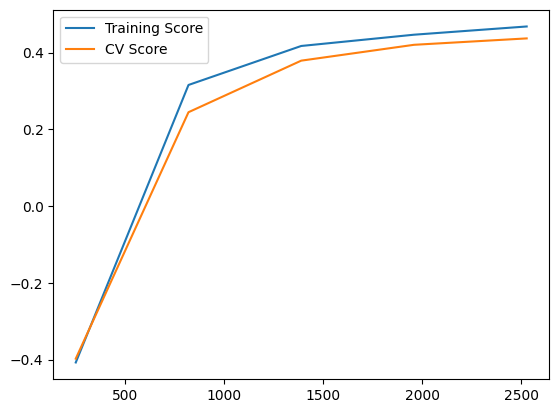

In [41]:
plt.plot(tsize, avg_tr_scores, label='Training Score')
plt.plot(tsize, avg_test_scores, label='CV Score')
plt.legend()
plt.show()